Import Libraries, Create Dataframe:

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns #python library for data visualization

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#print(housing.keys())
#print(housing.data)
#print(housing.target)
#etc

#pandas dataframe for creating a copy of the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

#use df.head() to see first five rows of dataframe
#use df.tail() to see last five rows of the created dataframe
#use df.dtype or df.info to know data type various features present in the dataset
#use df.isnull().sum() to check for missing values in each column

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Visualizing Data: Boxplot, Heatmap, Density

<Axes: >

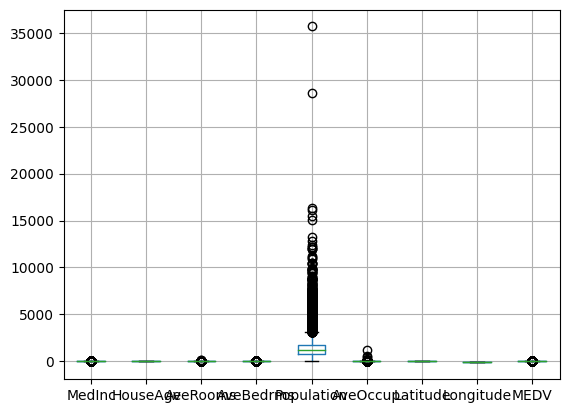

In [ ]:
df.boxplot()

In [ ]:
corr = df.corr()
sns.heatmap(corr)

<Axes: xlabel='MEDV', ylabel='Density'>

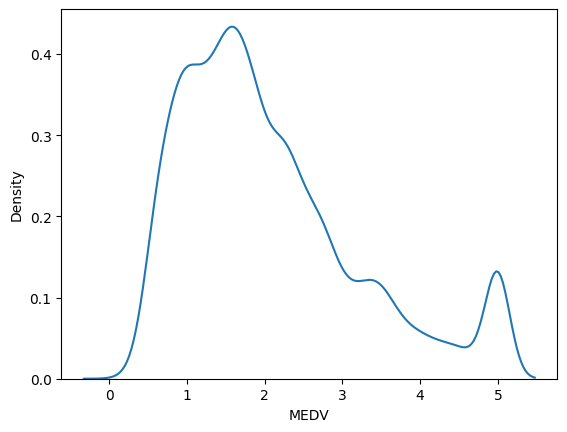

In [ ]:
sns.kdeplot(data=df, x="MEDV")

Training Model:

In [ ]:
#select elements to train model on
x1 = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
y1 = df['MEDV']

#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size =0.33,random_state = 5)

Use Regression on Model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

metrics.mean_absolute_error(y_test, y_pred)
metrics.mean_squared_error(y_test, y_pred)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))
metrics.r2_score(y_test, y_pred)

0.6121893744364773

Linear Regression, AveRooms to predict MEDV:

Text(0, 0.5, 'Median Value')

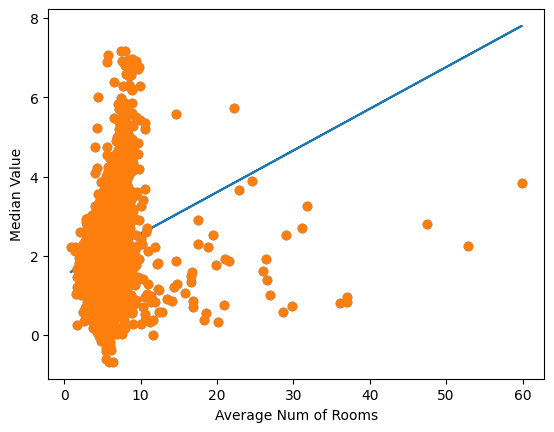

In [ ]:

x1 = np.array(x_test['AveRooms'])
y1 = np.array(y_pred)
model = np.polyfit(x1, y1, 1)
a, b = model

plt.scatter(x1, y1)

plt.plot(x_test['AveRooms'], (a*x_test['AveRooms'] + b))
plt.plot(x_test['AveRooms'], y_pred,'o')
plt.xlabel("Average Num of Rooms")
plt.ylabel("Median Value")

Linear Regression, HouseAge to predict MEDV

Text(0, 0.5, 'Median Value')

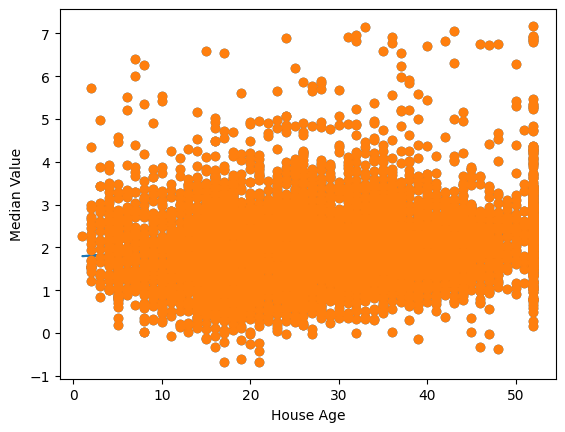

In [ ]:
x1 = np.array(x_test['HouseAge'])
y1 = np.array(y_pred)
model = np.polyfit(x1, y1, 1)
a, b = model

plt.scatter(x1, y1)

plt.plot(x_test['HouseAge'], (a*x_test['HouseAge'] + b))
plt.plot(x_test['HouseAge'], y_pred,'o')
plt.xlabel("House Age")
plt.ylabel("Median Value")

Linear Regression, Latitude to predict MEDV:

Text(0, 0.5, 'Median Value')

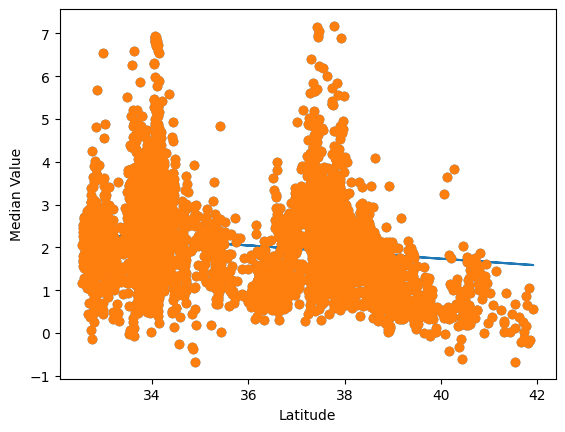

In [ ]:
x1 = np.array(x_test['Latitude'])
y1 = np.array(y_pred)
model = np.polyfit(x1, y1, 1)
a, b = model

plt.scatter(x1, y1)

plt.plot(x_test['Latitude'], (a*x_test['Latitude'] + b))
plt.plot(x_test['Latitude'], y_pred,'o')
plt.xlabel("Latitude")
plt.ylabel("Median Value")

Linear Regression, Longitude to predict MEDV:

Text(0, 0.5, 'Median Value')

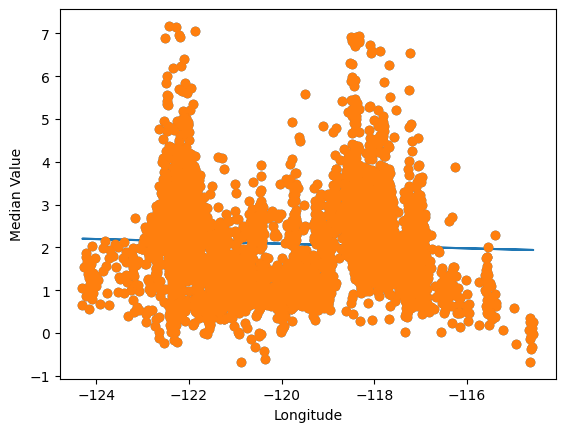

In [ ]:
x1 = np.array(x_test['Longitude'])
y1 = np.array(y_pred)
model = np.polyfit(x1, y1, 1)
a, b = model

plt.scatter(x1, y1)

plt.plot(x_test['Longitude'], (a*x_test['Longitude'] + b))
plt.plot(x_test['Longitude'], y_pred,'o')
plt.xlabel("Longitude")
plt.ylabel("Median Value")

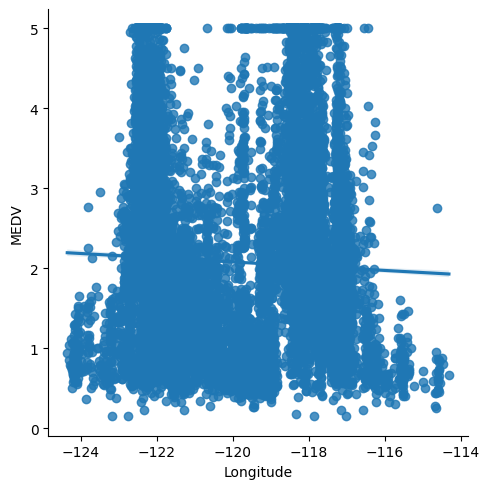

In [ ]:
sns.lmplot(x="Longitude", y="MEDV", data=df);

Pairplot:

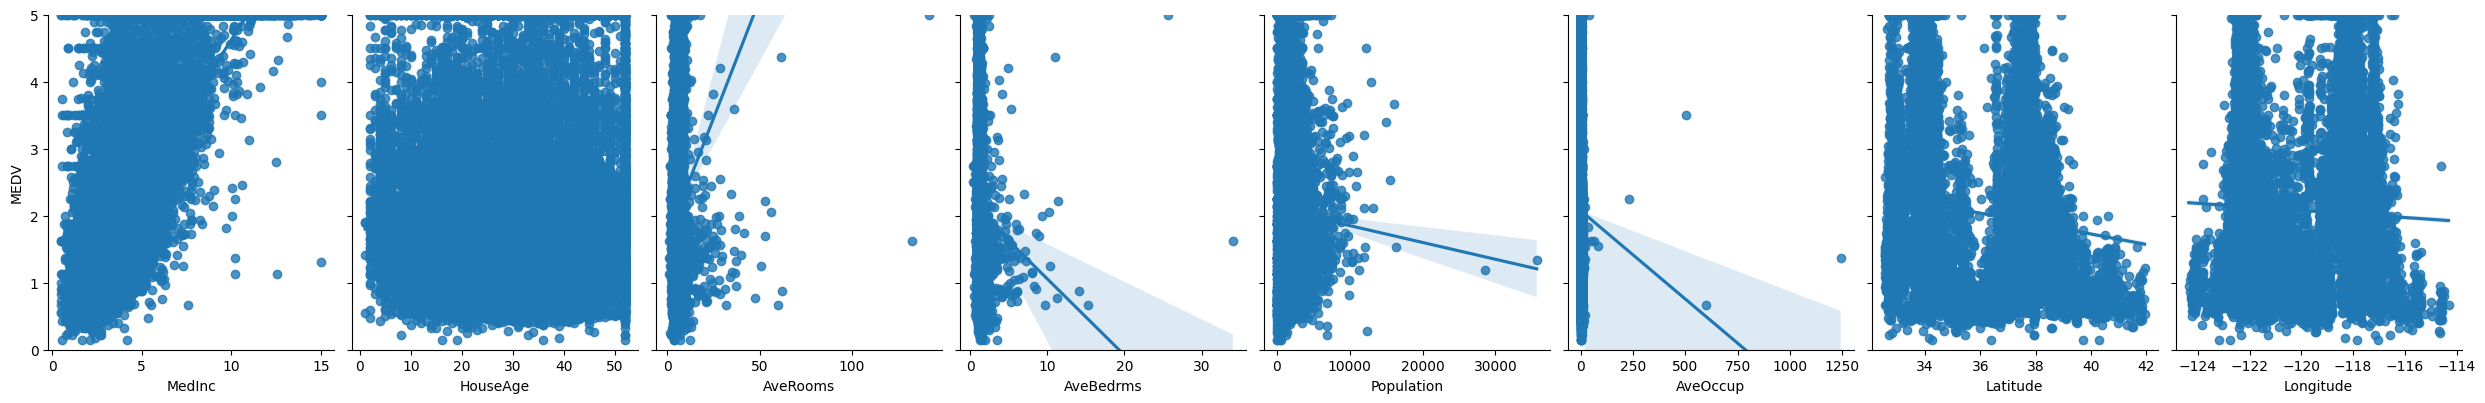

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target
p = sns.pairplot(df, x_vars=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'], y_vars=['MEDV'], height=4, aspect=0.8, kind='reg')
p.set(ylim = (0,5))
